In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [79]:
df = pd.read_csv('digit_data.csv');
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
df_array = df.values

In [81]:
shape = df_array.shape

In [82]:
np.random.shuffle(df_array)
df_array

array([[2, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [5, 0, 0, ..., 0, 0, 0],
       ...,
       [7, 0, 0, ..., 0, 0, 0],
       [3, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [83]:
test = df_array[:1000,:]
test = test.T
testLabel = test[0,:]
test = test[1:,:]
test = test/255

In [84]:
train = df_array[1000:,:]
train = train.T
trainLabel = train[0,:]
train = test[1:,:]
train = test/255

TypeError: Invalid shape (784,) for image data

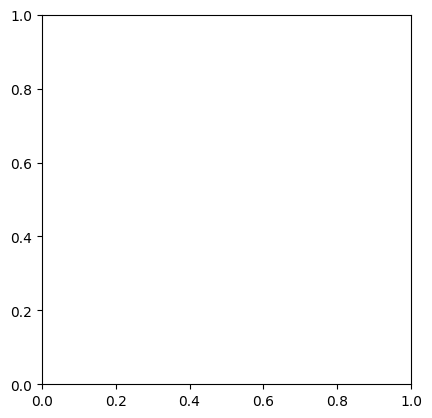

In [85]:
randIndex = np.random.randint(0, len(train))
image = train[:, randIndex].reshape(28*28)
label = trainLabel[randIndex]
plt.imshow(image, cmap='gray')

In [102]:
def initialize():
    w1 = np.random.uniform(-0.5, 0.5, size=(10, 784))
    w2 = np.random.uniform(-0.5, 0.5, size=(10, 10))    
    b1 = np.random.uniform(-0.5, 0.5, size=(10, 1))    
    b2 = np.random.uniform(-0.5, 0.5, size=(10, 1))
    
    return w1, b1, w2, b2

In [103]:
def relu(inpVec):
    reluRes = [max(0,x) for x in inpVec]
    return reluRes

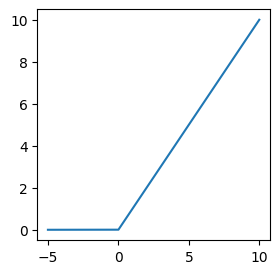

In [123]:
inpVec = np.linspace(-5, 10, 10000)
plt.figure(figsize=(3,3))
plt.plot(inpVec, relu(inpVec))

In [104]:
def relu_derivative(input_vector):
    result = [1 if x > 0 else 0 for x in input_vector]
    return result

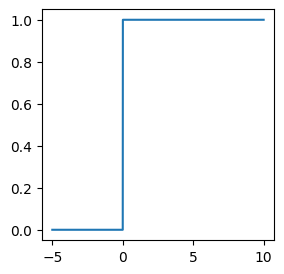

In [124]:
inpVec = np.linspace(-5, 10, 10000)
plt.figure(figsize=(3,3))
plt.plot(inpVec, relu_derivative(inpVec))

In [125]:
def softmax(inpVec):
    exp_input = np.exp(inpVec)
    sum_exp = np.sum(exp_input)
    softmax_result = exp_input/sum_exp

    return softmax_result

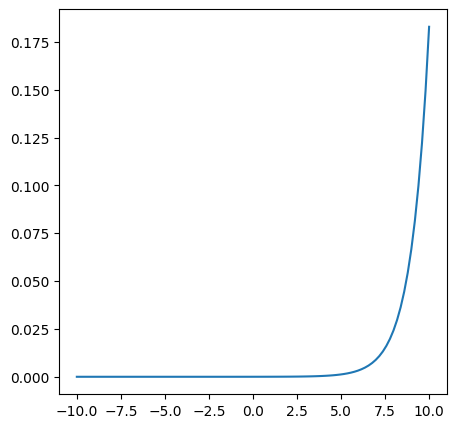

In [138]:
inpVec = np.linspace(-10, 10, 100)
plt.figure(figsize=(5,5))
plt.plot(inpVec, softmax(inpVec))

In [140]:
def forward_propagation(A0, w1, b1, w2, b2):
    z1 = np.dot(w1,A0) + b1
    a1 = relu(z1)
    z2 = np.dot(w2, a1) + b2
    a2 = softmax(z2)
    
    return z1, a1, z2, a2

In [141]:
def one_hot(ind):
    x = np.zeros(10)
    x[ind] = 1
    return x